# Projeto de Previsão de Churn em Serviços de Telecomunicações

Este projeto tem como objetivo desenvolver modelos de aprendizado de máquina capazes de prever a evasão de clientes (churn) em uma empresa do setor de telecomunicações. A base de dados utilizada contém informações de clientes, seus serviços contratados, comportamento de uso e histórico de permanência ou saída da empresa.

A previsão de churn é uma tarefa clássica de classificação binária, em que o modelo deve indicar se um cliente está propenso ou não a abandonar o serviço. A capacidade de antecipar esse comportamento é essencial para a retenção de clientes, permitindo que a empresa adote medidas preventivas e estratégias de fidelização.

Serão utilizados diferentes modelos de classificação, incluindo redes neurais (MLP), modelos baseados em árvores (Random Forest, Gradient Boosting) e abordagens mais recentes com uso de transformadores, como os modelos STab e TabPFN. A comparação entre esses modelos permitirá identificar a melhor abordagem para o problema proposto.

## Equipe:

- Amanda Arruda Melo Silva (aams2)
- Lucas Vinícius da Silva
- Luís Felipe Oliveira Costa
- Michel Leonidas Aleixo da Silva
- Severino Carlos da Silva Junior (scsj)

In [ ]:
# Instalação das bibliotecas necessárias

# Keras
!pip install tensorflow[and-cuda]

# Bibliotecas básicas
!pip install pandas numpy scikit-learn matplotlib seaborn

# PyTorch (necessário para STab e TabPFN)
!pip install torch torchvision torchaudio

# Wrapper Keras-for-PyTorch (requisito do STab)
!pip install keras4torch

# Repositório STab com base no que foi fornecido no Classroom
!git clone https://github.com/kailanefelix/stab-redes-neurais.git

# TabPFN
!pip install tabpfn

# Optuna
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
## Importação de Bibliotecas e Carregamento da Base de Dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

import kagglehub

# Download latest version
path = kagglehub.dataset_download("kapturovalexander/customers-churned-in-telecom-services")

files = os.listdir(path)
csv_file = os.path.join(path, files[0])  # pega o primeiro arquivo encontrado

# Carregamento da base de dados
df = pd.read_csv(csv_file)
print(f"Dimensões do dataset: {df.shape[0]} linhas × {df.shape[1]} colunas") # Para verificar se está correto
display(df.head())

Dimensões do dataset: 7043 linhas × 20 colunas


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise Exploratória dos Dados (EDA)

Nesta etapa, traremos:

1. **Visão Geral**  
   - Tipos de dados por coluna  
   - Contagem de valores faltantes

2. **Variáveis Numéricas**  
   - Estatísticas descritivas (média, mediana, quartis, min, max)  
   - Detecção de outliers via IQR (número de outliers em cada coluna)  
   - Histogramas com KDE para visualizar distribuição  

3. **Variáveis Categóricas**  
   - Contagem de categorias e percentuais  
   - Gráficos de barras para as principais categorias  

4. **Relação com o Alvo (Target)**  
   - Taxa de churn por categoria (para variáveis categóricas)  
   - Boxplots de variáveis numéricas por classe de churn  

5. **Matriz de Correlação**  
   - Heatmap das correlações entre variáveis numéricas e churn

Assim, vamos entender melhor como devemos fazer o nosso pré-processamento.

Tipos de dados e valores faltantes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object 

Valores faltantes por coluna:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBill

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
ChurnFlag,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


Contagem de Outliers (IQR) em Cada Variável Numérica

SeniorCitizen     1142
tenure               0
MonthlyCharges       0
TotalCharges         0
ChurnFlag            0
dtype: int64 



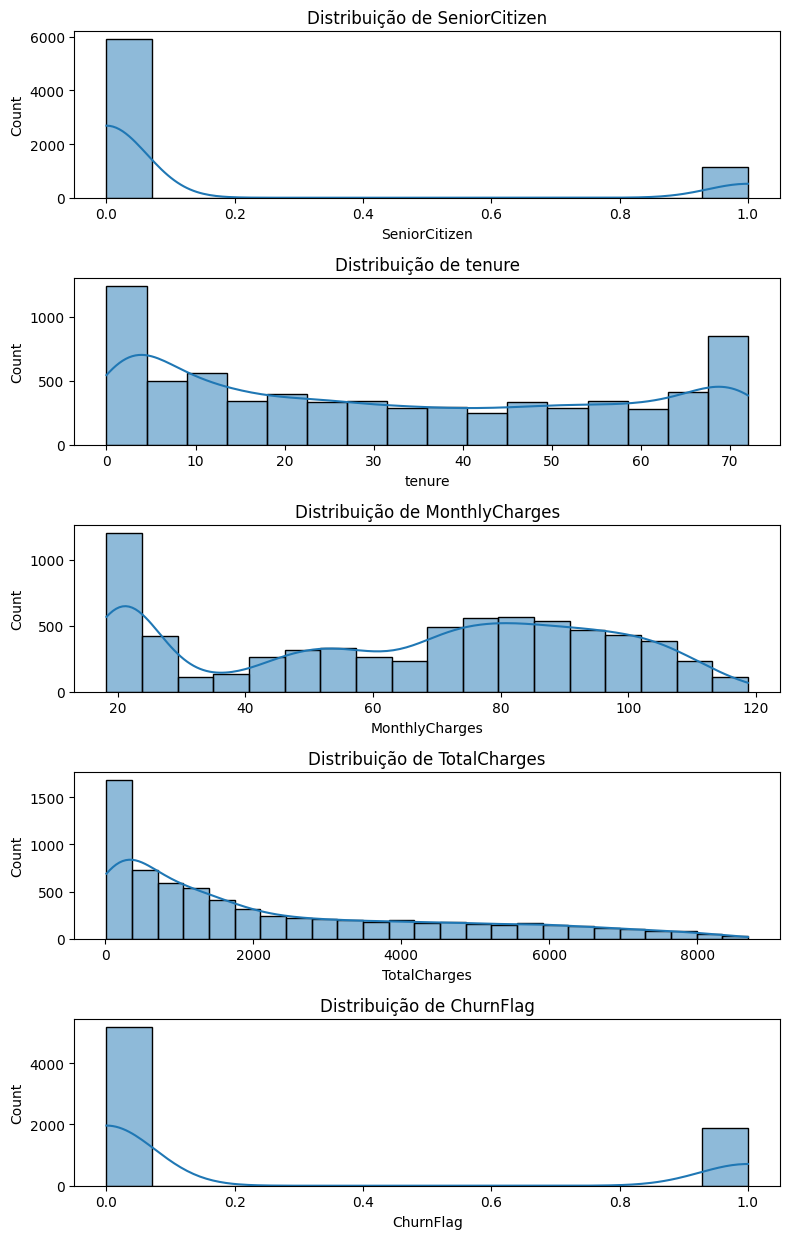

Contagem de Categorias

gender:
        Count  Percent
gender                
Male     3555    50.48
Female   3488    49.52

Partner:
         Count  Percent
Partner                
No        3641     51.7
Yes       3402     48.3

Dependents:
            Count  Percent
Dependents                
No           4933    70.04
Yes          2110    29.96

PhoneService:
              Count  Percent
PhoneService                
Yes            6361    90.32
No              682     9.68

MultipleLines:
                  Count  Percent
MultipleLines                   
No                 3390    48.13
Yes                2971    42.18
No phone service    682     9.68

InternetService:
                 Count  Percent
InternetService                
Fiber optic       3096    43.96
DSL               2421    34.37
No                1526    21.67

OnlineSecurity:
                     Count  Percent
OnlineSecurity                     
No                    3498    49.67
Yes                   2019    28.6

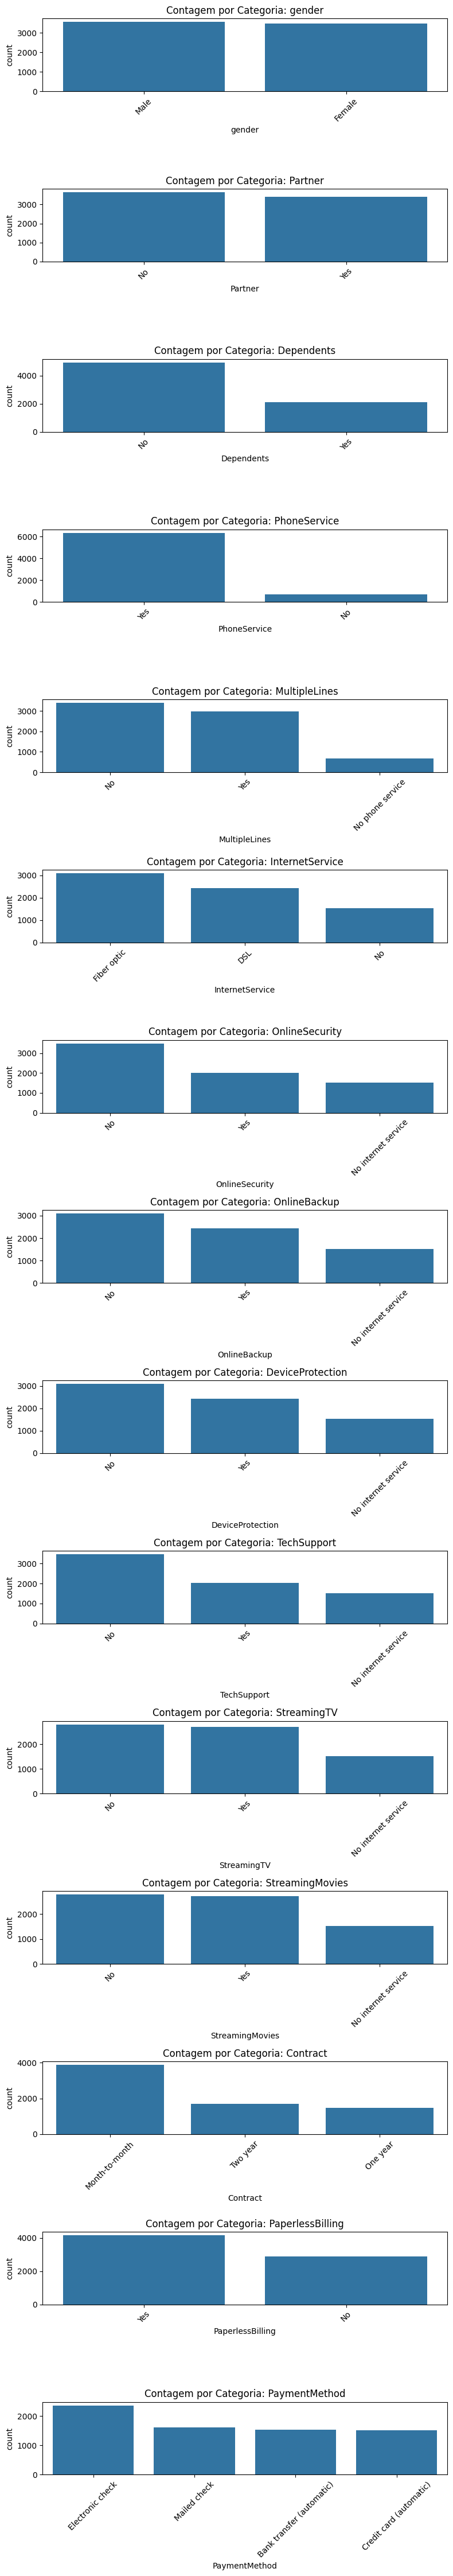

Churn Rate por Categoria (Variáveis Categóricas)

gender:
        Churn Rate
gender            
Female    0.269209
Male      0.261603

Partner:
         Churn Rate
Partner            
No         0.329580
Yes        0.196649

Dependents:
            Churn Rate
Dependents            
No            0.312791
Yes           0.154502

PhoneService:
              Churn Rate
PhoneService            
Yes             0.267096
No              0.249267

MultipleLines:
                  Churn Rate
MultipleLines               
Yes                 0.286099
No                  0.250442
No phone service    0.249267

InternetService:
                 Churn Rate
InternetService            
Fiber optic        0.418928
DSL                0.189591
No                 0.074050

OnlineSecurity:
                     Churn Rate
OnlineSecurity                 
No                     0.417667
Yes                    0.146112
No internet service    0.074050

OnlineBackup:
                     Churn Rate
OnlineBackup 

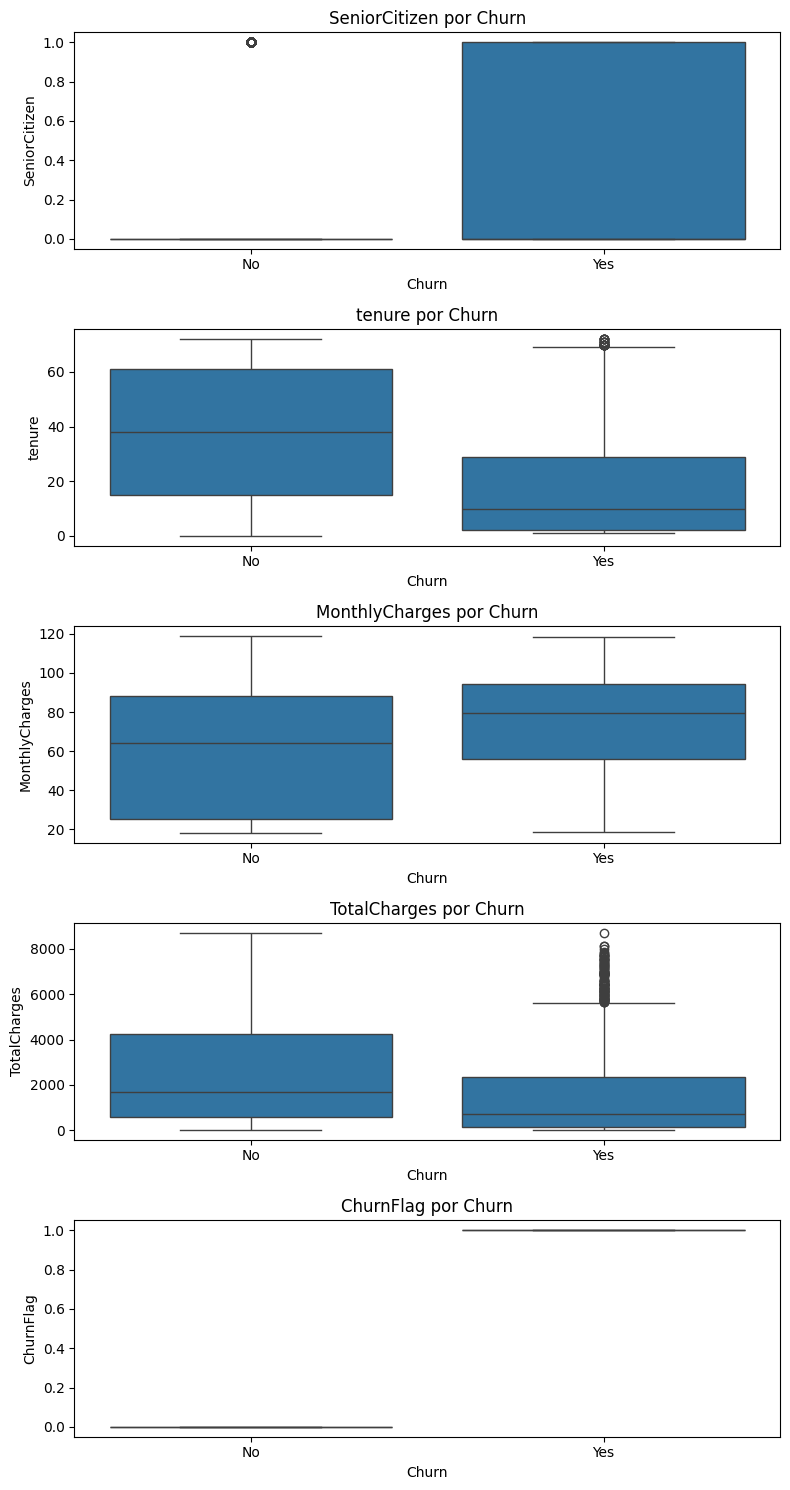

Matriz de Correlação



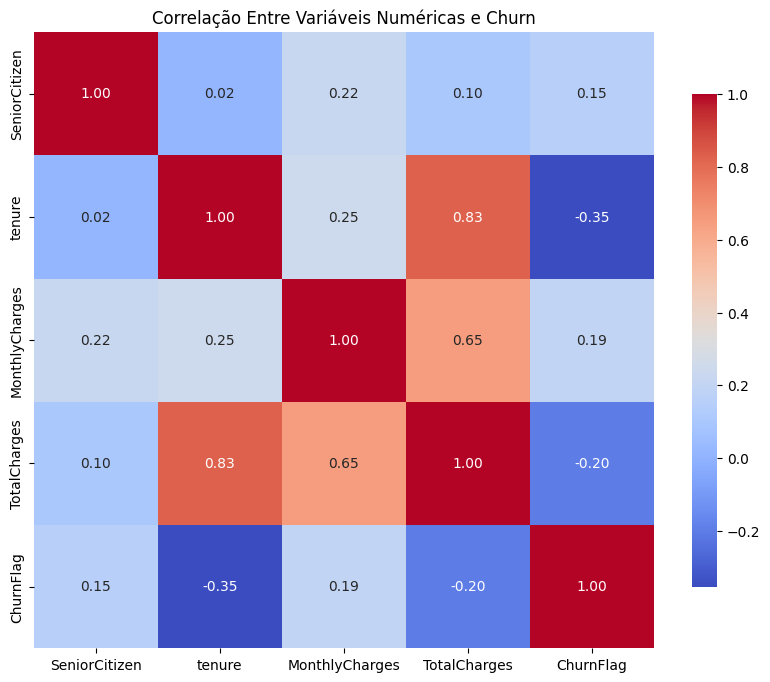

In [ ]:
# Análise Exploratória Detalhada

# Visão Geral
print("Tipos de dados e valores faltantes\n")
print(df.dtypes, "\n")
print("Valores faltantes por coluna:")
print(df.isnull().sum(), "\n")

# Converter target 'Churn' para variável numérica
df['ChurnFlag'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Variáveis Numéricas
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Estatísticas Descritivas das Variáveis Numéricas\n")
display(df[num_cols].describe().T)

# Detecção de outliers com IQR
print("Contagem de Outliers (IQR) em Cada Variável Numérica\n")
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print(outliers_count, "\n")

# Histogramas com KDE
import matplotlib.gridspec as gridspec
plt.figure(figsize=(8, len(num_cols)*2.5))
gs = gridspec.GridSpec(len(num_cols), 1)
for i, col in enumerate(num_cols):
    ax = plt.subplot(gs[i])
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Variáveis Categóricas (excluindo o target)
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'Churn']
print("Contagem de Categorias\n")
for col in cat_cols:
    vc = df[col].value_counts(dropna=False)
    print(f"{col}:\n{vc.to_frame('Count').assign(Percent=vc/len(df)*100).round(2)}\n")

# Gráficos de barras para categorias mais frequentes
plt.figure(figsize=(8, len(cat_cols)*3))
for i, col in enumerate(cat_cols):
    ax = plt.subplot(len(cat_cols), 1, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'Contagem por Categoria: {col}')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Relação com o Target
print("Churn Rate por Categoria (Variáveis Categóricas)\n")
for col in cat_cols:
    rate = df.groupby(col)['ChurnFlag'].mean().rename('Churn Rate')
    print(f"{col}:\n{rate.to_frame().sort_values('Churn Rate', ascending=False)}\n")

# Boxplots de variáveis numéricas por churn
plt.figure(figsize=(8, len(num_cols)*3))
for i, col in enumerate(num_cols):
    ax = plt.subplot(len(num_cols), 1, i+1)
    sns.boxplot(data=df, x='Churn', y=col, ax=ax)
    ax.set_title(f'{col} por Churn')
plt.tight_layout()
plt.show()

# Matriz de Correlação (numéricas + ChurnFlag)
print("Matriz de Correlação\n")
corr_df = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink':.8})
plt.title('Correlação Entre Variáveis Numéricas e Churn')
plt.show()


## Sobre os resultados:
1. TotalCharges apresenta 11 valores ausentes.

2. Distribuições Univariadas

   * SeniorCitizen é binária e muito desequilibrada, com ~16 % de idosos.

     * O histograma com KDE mostrou pico em 0 (não idosos) e um menor em 1.

   * tenure (tempo de contrato) tem pico em valores baixos (clientes novos) e outro em altos (clientes que permanecem há muito tempo).

     * O histograma e KDE de tenure evidenciaram concentração tanto em valores baixos (0–10 meses) como em altos (60–72 meses).

   * MonthlyCharges mostra uma distribuição quase uniforme entre ~20 e ~120, com leve concentração em torno de 70.

     * O histplot de MonthlyCharges mostrou valores distribuídos entre \~20 e \~120, com média em \~64 e mediana em \~70.

   * TotalCharges é fortemente enviesada à direita (skew), pois clientes de longa data acumulam muito gasto.

     * O histplot de TotalCharges revelou forte assimetria à direita, compatível com clientes de longa data acumulando maiores cobranças totais.

   * ChurnFlag (~26 %) indica que apenas um quarto dos clientes abandona.

     * A distribuição de ChurnFlag (convertido de “Yes”/“No” para 1/0) mostrou uma proporção de aproximadamente 0,26 de valores iguais a 1.

3. Outliers

   * Apenas SeniorCitizen (que deveria ser 0/1) gerou “outliers” pelo critério IQR (provavelmente pela interpretação de float). As demais variáveis numéricas estão bem comportadas.

     * A “contagem de outliers via IQR” indicou 1.142 outliers em SeniorCitizen, reflexo de ele estar sendo considerado como numérico (0/1) e portanto considerado fora do intervalo interquartil. As demais colunas numéricas tiveram zero outliers segundo esse critério.

4. Taxas de Churn por Categoria

   * Clientes em contratos “Month-to-month” exibem a maior taxa de abandono (≈43 %), enquanto aqueles em contratos de dois anos apresentam o menor índice (≈3 %).
   * No método de pagamento, quem utiliza “Electronic check” tem churn de ≈45 %, bem acima de quem opta por débito automático ou cartão de crédito (≈15 %).
   * Quanto ao serviço de internet, usuários de fibra óptica abandonam em ≈42 %, muito mais do que clientes de DSL (≈19 %) ou sem serviço de internet (≈7 %). Além disso, a ausência de serviços opcionais como segurança online, backup e suporte técnico está associada a churn de ≈40–42 %, ao passo que quem contrata essas proteções tem churn reduzido para ≈14–22 %.
   * Clientes com fatura eletrônica (“PaperlessBilling”) apresentam churn de ≈34 %, quase o dobro dos usuários que recebem a fatura física (≈16 %).

   Em resumo, clientes sem contrato de longo prazo, que pagam por cheque eletrônico, com serviços básicos de internet (esp. fibra), e sem serviços adicionais são os que mais desistem.

5. Boxplots Numérico × Churn

   * tenure

     * O boxplot de tenure separado por Churn mostrou mediana de \~9 meses para churn=Yes e \~37 meses para churn=No. Churn tende a ocorrer em quem tem tenancy muito menor (mediana ~9 meses).

   * MonthlyCharges

     * No boxplot de MonthlyCharges, a mediana para churn=Yes estava em uma faixa mais alta (\~80) que para churn=No (\~65). Churn tende a ocorrer em faixas moderadas-altas de cobrança mensal.

   * TotalCharges

     * O boxplot de TotalCharges exibiu que os clientes com churn=Yes concentraram-se em valores baixos de cobrança total, enquanto churn=No tinha muitos valores elevados.

6. Correlação vista no Heatmap

  * tenure <-> ChurnFlag: correlação de –0,35 (mais tempo de contrato -> menor churn).
  * TotalCharges <-> ChurnFlag: –0,20 (maior gasto acumulado -> menor churn).
  * MonthlyCharges <-> ChurnFlag: +0,19 (cobranças mais altas tendem a ter mais churn).
  * SeniorCitizen <-> ChurnFlag: +0,15 (idosos têm probabilidade levemente maior de churn).

In [ ]:
# Padronização de Treino / Validação / Teste

from sklearn.model_selection import train_test_split

def get_train_val_test(df, X, y):
  X_train, X_temp, y_train, y_temp = train_test_split(
      X, y, test_size=0.5, stratify=y, random_state=42
  )

  return X_train, X_temp, y_train, y_temp

def get_val_test(df, X_temp, y_temp):
  X_val, X_test, y_val, y_test = train_test_split(
      X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
  )

  return X_val, X_test, y_val, y_test

def get_X_y(df):
    X = df.drop(columns=['customerID', 'Churn', 'ChurnFlag'], errors='ignore')
    y = df['ChurnFlag']
    return X, y


X, y = get_X_y(df)

X_train, X_temp, y_train, y_temp = get_train_val_test(df, X, y)
X_val, X_test, y_val, y_test = get_val_test(df, X_temp, y_temp)

### Sobre as features e o target (x e y):

Removemos customerID porque é um id de cada cliente, não traz informação preditiva, apenas “rótulos” que podem causar overfitting. Removemos também Churn (string “Yes”/“No”) e ChurnFlag (0/1) para garantir que X contenha apenas variáveis independentes, sem incluir o próprio alvo.
Usamos ChurnFlag como variável dependente porque os modelos de classificação numérica exigem um vetor-limite binário.
Estamos querendo evitar o vazamento de informação com isso, já que é um dos requisitos para o projeto.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

def preprocess_data(X_train, y_train, X_val, X_test):
    # Definição de features numéricas e categóricas
    num_feats = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
    cat_feats = X_train.select_dtypes(include=['object','category']).columns.tolist()

    # Remoção de outliers apenas no treino
    Q1 = X_train[num_feats].quantile(0.25)
    Q3 = X_train[num_feats].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((X_train[num_feats] < (Q1 - 1.5 * IQR)) |
             (X_train[num_feats] > (Q3 + 1.5 * IQR))).any(axis=1)
    X_train, y_train = X_train[mask], y_train[mask]

    # Pipeline de imputação, escala e encode
    preprocessor = ColumnTransformer([
        # numéricas: impute -> escala
        ('num', Pipeline([
            ('imp', SimpleImputer(strategy='median')), # Preenche os 11 valores que vimos que faltavam com a mediana
            ('scl', StandardScaler()) # Padroniza mean = 0, std = 1
        ]), num_feats),
        # categóricas: impute constante -> one-hot
        ('cat', Pipeline([
            ('imp', SimpleImputer(strategy='constant', fill_value='Missing')), # Cobre eventuais strings nulas categóricas com missing
            ('oh', OneHotEncoder(drop='first', sparse_output=False)) #  Converte variáveis categóricas em dummies, excluindo a primeira categoria para evitar multicolinearidade.
        ]), cat_feats)
    ])

    # Aplicação do pré-processamento
    X_train_proc = preprocessor.fit_transform(X_train)
    X_val_proc = preprocessor.transform(X_val)
    X_test_proc = preprocessor.transform(X_test)

    return X_train_proc, y_train, X_val_proc, X_test_proc, preprocessor


X_train_proc, y_train, X_val_proc, X_test_proc, preprocessor = preprocess_data(X_train, y_train, X_val, X_test)


print("Pré-processamento concluído:")
print(" TREINO:", X_train_proc.shape)
print(" VALIDAÇÃO:", X_val_proc.shape)
print(" TESTE:", X_test_proc.shape)

Pré-processamento concluído:
 TREINO: (2957, 30)
 VALIDAÇÃO: (1761, 30)
 TESTE: (1761, 30)


# Modelo 1 - TabPFN

In [ ]:
import numpy as np
from sklearn.metrics import (
    roc_auc_score, precision_recall_fscore_support, confusion_matrix,
    log_loss, roc_curve, mean_squared_error
)

# Avaliação a partir de probabilidades
def evaluate_probs(y_true, y_prob):
    # AUC
    auc = roc_auc_score(y_true, y_prob)

    # KS como max(TPR-FPR) na ROC
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    ks_curve = tpr - fpr
    ks = float(np.max(ks_curve))
    thr_ks = float(thr[np.argmax(ks_curve)]) if thr.size > 0 else 0.5

    # Métricas em thr=0.5
    y_05 = (y_prob >= 0.5).astype(int)
    p05, r05, f105, _ = precision_recall_fscore_support(
        y_true, y_05, average='binary', zero_division=0
    )
    cm05 = confusion_matrix(y_true, y_05)

    # Métricas no thr ótimo de KS
    y_ks = (y_prob >= thr_ks).astype(int)
    pks, rks, f1ks, _ = precision_recall_fscore_support(
        y_true, y_ks, average='binary', zero_division=0
    )
    cmks = confusion_matrix(y_true, y_ks)

    # Perdas numéricas
    mse_val = mean_squared_error(y_true, y_prob)
    ce_val = log_loss(y_true, y_prob, labels=[0, 1])

    return {
        'AUC': auc, 'KS': ks, 'KS_threshold': thr_ks,
        'Precision_0.5': p05, 'Recall_0.5': r05, 'F1_0.5': f105, 'CM_0.5': cm05,
        'Precision_KS': pks, 'Recall_KS': rks, 'F1_KS': f1ks, 'CM_KS': cmks,
        'MSE_val': mse_val, 'CrossEntropy_val': ce_val,
        'ROC_points': (fpr, tpr)
    }

In [ ]:
!pip install -e git+https://github.com/PriorLabs/tabpfn-extensions.git#egg=tabpfn-extensions[all]
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier
import torch
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device:", device)

DEPRECATION: git+https://github.com/PriorLabs/tabpfn-extensions.git#egg=tabpfn-extensions[all] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Obtaining tabpfn-extensions[all] from git+https://github.com/PriorLabs/tabpfn-extensions.git#egg=tabpfn-extensions[all] (from tabpfn-extensions[all])
  Updating ./src/tabpfn-extensions clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 7ba86fe8ec3aca60cf2322de1ff74b3180871230
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for tabpfn-extensions (pyproject.toml) ... done
  Created wheel for tabpfn-extensions: filename=tabpfn_extensions-0.1.3-0.e

In [ ]:
model_tabpfn = AutoTabPFNClassifier(device=device, ignore_pretraining_limits=True)

# Get the data split using the original dataframe
X, y = get_X_y(df)
X_train, X_temp, y_train, y_temp = get_train_val_test(df, X, y)
X_val, X_test, y_val, y_test = get_val_test(df, X_temp, y_temp)

# Apply minimal preprocessing for TabPFN: handle missing values and convert dtypes
# TabPFN handles categorical encoding internally
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category')
        X_val[col] = X_val[col].astype('category')
        X_test[col] = X_test[col].astype('category')

# Impute missing values in TotalCharges (only numerical column with NaNs)
imputer = SimpleImputer(strategy='median')
X_train['TotalCharges'] = imputer.fit_transform(X_train[['TotalCharges']])
X_val['TotalCharges'] = imputer.transform(X_val[['TotalCharges']])
X_test['TotalCharges'] = imputer.transform(X_test[['TotalCharges']])


# Convert data to numpy arrays (TabPFN expects numpy arrays or pandas DataFrames)
X_train_np_tabpfn = X_train.to_numpy()
X_val_np_tabpfn = X_val.to_numpy()
y_train_np_tabpfn = y_train.to_numpy()
y_val_np_tabpfn = y_val.to_numpy()


print("Iniciando o 'treinamento' (in-context learning) do modelo TabPFN...")
model_tabpfn.fit(X_train_np_tabpfn, y_train_np_tabpfn)

y_val_prob_tabpfn = model_tabpfn.predict_proba(X_val_np_tabpfn)[:, 1]

print("\nAvaliação do modelo TabPFN...")
metrics_tabpfn = evaluate_probs(y_val_np_tabpfn, y_val_prob_tabpfn)

row_tabpfn = {
    'model': 'TabPFN',
    'loss_train': 'N/A',
    'epochs_trained': np.nan,
    **{k: v for k, v in metrics_tabpfn.items() if k not in ['CM_0.5','CM_KS','ROC_points']}
}

df_results_tabpfn = pd.DataFrame([row_tabpfn])

# Exibir os resultados do TabPFN
display(df_results_tabpfn)

Iniciando o 'treinamento' (in-context learning) do modelo TabPFN...


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.21 GB / 12.67 GB (88.4%)
Disk Space Avail:   67.61 GB / 112.64 GB (60.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU memory.
	presets='best'    : Maximize accuracy. Recommended for most users. Use in 

tabpfn-v2-classifier.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

	0.7972	 = Validation score   (accuracy)
	86.94s	 = Training   runtime
	77.46s	 = Validation runtime
Fitting model: TabPFNv2_2_BAG_L1 ... Training model for up to 272.33s of the 272.33s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)


tabpfn-v2-classifier-od3j1g5m.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

	0.8114	 = Validation score   (accuracy)
	28.53s	 = Training   runtime
	20.89s	 = Validation runtime
Fitting model: TabPFNv2_3_BAG_L1 ... Training model for up to 243.62s of the 243.62s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)


tabpfn-v2-classifier-vutqq28w.ckpt:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

	0.8094	 = Validation score   (accuracy)
	36.44s	 = Training   runtime
	28.58s	 = Validation runtime
Fitting model: TabPFNv2_4_BAG_L1 ... Training model for up to 207.01s of the 207.01s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)


tabpfn-v2-classifier-znskzxi4.ckpt:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

	0.8069	 = Validation score   (accuracy)
	24.69s	 = Training   runtime
	19.19s	 = Validation runtime
Fitting model: TabPFNv2_5_BAG_L1 ... Training model for up to 182.21s of the 182.21s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)
	0.8103	 = Validation score   (accuracy)
	28.13s	 = Training   runtime
	22.42s	 = Validation runtime
Fitting model: TabPFNv2_6_BAG_L1 ... Training model for up to 153.92s of the 153.91s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)
	0.8091	 = Validation score   (accuracy)
	36.2s	 = Training   runtime
	29.18s	 = Validation runtime
Fitting model: TabPFNv2_7_BAG_L1 ... Training model for up to 117.58s of the 117.57s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)
	0.8111	 = Validation score   (accu

tabpfn-v2-classifier-llderlii.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

	Time limit exceeded... Skipping TabPFNv2_11_BAG_L1.
Fitting model: TabPFNv2_12_BAG_L1 ... Training model for up to 18.24s of the 18.23s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)
	Time limit exceeded... Skipping TabPFNv2_12_BAG_L1.
Fitting model: TabPFNv2_13_BAG_L1 ... Training model for up to 13.33s of the 13.32s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)
	Time limit exceeded... Skipping TabPFNv2_13_BAG_L1.
Fitting model: TabPFNv2_14_BAG_L1 ... Training model for up to 9.12s of the 9.12s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=1, gpus=1)
	Time limit exceeded... Skipping TabPFNv2_14_BAG_L1.
Fitting model: TabPFNv2_15_BAG_L1 ... Training model for up to 5.95s of the 5.94s of remaining time.
	Fitting 8 child models (S1F1

tabpfn-v2-classifier-gn2p4bpt.ckpt:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

	Time limit exceeded... Skipping TabPFNv2_15_BAG_L1.
Fitting model: WeightedEnsemble_L2 ... Training model for up to 359.48s of the 3.09s of remaining time.
	Ensemble Weights: {'TabPFNv2_2_BAG_L1': 0.714, 'TabPFNv2_7_BAG_L1': 0.286}
	0.8128	 = Validation score   (accuracy)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 356.96s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 79.2 rows/s (3521 batch size)
Disabling decision threshold calibration for metric `accuracy` due to having fewer than 10000 rows of validation data for calibration, to avoid overfitting (3521 rows).
	`accuracy` is generally not improved through threshold calibration. Force calibration via specifying `calibrate_decision_threshold=True`.
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/TabPFNModels/m-20250812_000057")



Avaliação do modelo TabPFN...


,model,loss_train,epochs_trained,AUC,KS,KS_threshold,Precision_0.5,Recall_0.5,F1_0.5,Precision_KS,Recall_KS,F1_KS,MSE_val,CrossEntropy_val
0,TabPFN,N/A,NaN,0.844388,0.527698,0.204312,0.654054,0.517094,0.577566,0.491294,0.844017,0.621069,0.137022,0.418738


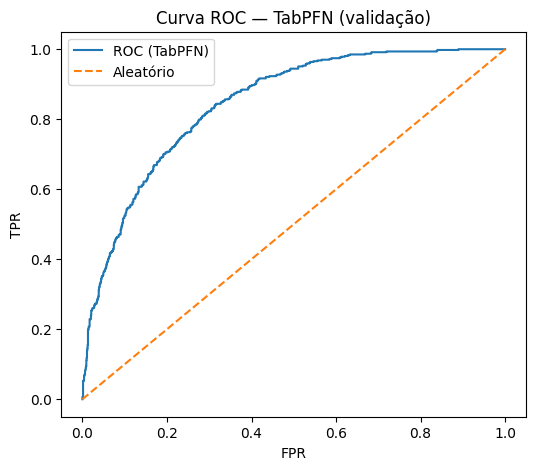

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

# Converter y_val para numpy
y_val_np = np.array(y_val)

# Gerar FPR e TPR para a curva ROC
fpr, tpr, _ = roc_curve(y_val_np, y_val_prob_tabpfn)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='ROC (TabPFN)')
plt.plot([0,1],[0,1],'--', label='Aleatório')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC — TabPFN (validação)')
plt.legend()
plt.show()

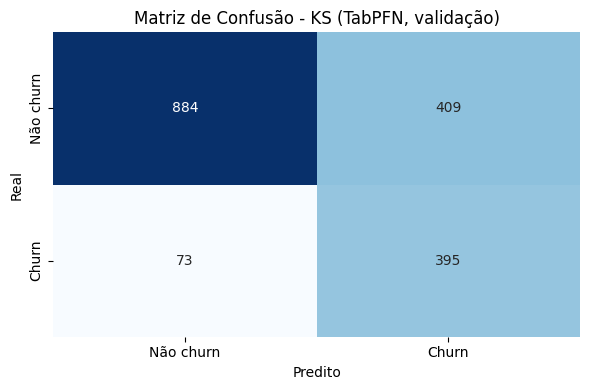

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_tabpfn = metrics_tabpfn['CM_KS']
plt.figure(figsize=(6,4))
sns.heatmap(cm_tabpfn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não churn','Churn'],
            yticklabels=['Não churn','Churn'])
plt.title('Matriz de Confusão - KS (TabPFN, validação)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

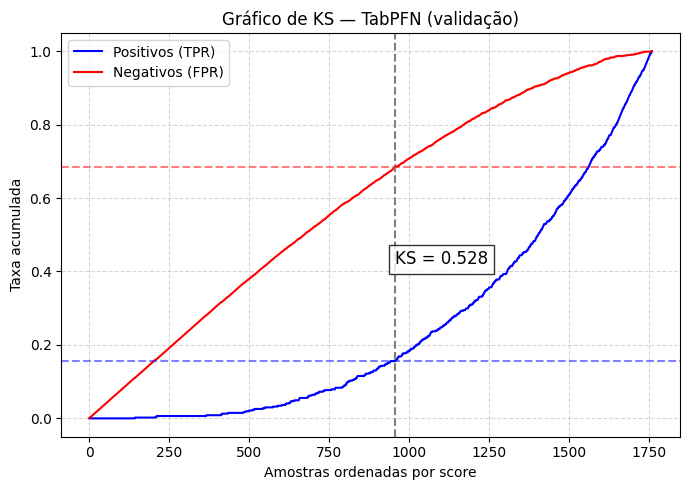

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Converta para arrays NumPy se necessário
y_true = np.array(y_val)
y_score = np.array(y_val_prob_tabpfn)

# Ordena pelas probabilidades
order = np.argsort(y_score)
y_true_sorted = y_true[order]

# Calcula taxas acumuladas
n_pos = np.sum(y_true_sorted == 1)
n_neg = np.sum(y_true_sorted == 0)

cum_pos_rate = np.cumsum(y_true_sorted == 1) / n_pos
cum_neg_rate = np.cumsum(y_true_sorted == 0) / n_neg

# Calcula KS
ks_values = np.abs(cum_pos_rate - cum_neg_rate)
ks_stat = np.max(ks_values)
ks_idx = np.argmax(ks_values)

# Plota
plt.figure(figsize=(7,5))
plt.plot(cum_pos_rate, label='Positivos (TPR)', color='blue')
plt.plot(cum_neg_rate, label='Negativos (FPR)', color='red')
plt.axvline(x=ks_idx, color='grey', linestyle='--')
plt.axhline(y=cum_pos_rate[ks_idx], color='blue', linestyle='--', alpha=0.5)
plt.axhline(y=cum_neg_rate[ks_idx], color='red', linestyle='--', alpha=0.5)
plt.text(ks_idx, (cum_pos_rate[ks_idx]+cum_neg_rate[ks_idx])/2, f'KS = {ks_stat:.3f}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.title('Gráfico de KS — TabPFN (validação)')
plt.xlabel('Amostras ordenadas por score')
plt.ylabel('Taxa acumulada')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Modelo 2 - Stab


In [ ]:
!pip install einops
!pip install tab-transformer-pytorch

In [ ]:
def convert_to_np(X_train_proc, X_val_proc, y_train, y_val):
  # Converter os dados pra np.float32 para facilitar pro Keras
  X_train_np = np.asarray(X_train_proc, dtype=np.float32)
  X_val_np   = np.asarray(X_val_proc, dtype=np.float32)
  y_train_np = np.asarray(y_train, dtype=np.float32)
  y_val_np   = np.asarray(y_val, dtype=np.float32)

  return X_train_np, X_val_np, y_train_np, y_val_np

X_train_np, X_val_np, y_train_np, y_val_np = convert_to_np(X_train_proc, X_val_proc, y_train, y_val)


In [ ]:
# Avaliação a partir de probabilidades
def evaluate_probs(y_true, y_prob):
    # AUC
    auc = roc_auc_score(y_true, y_prob)

    # KS como max(TPR-FPR) na ROC
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    ks_curve = tpr - fpr
    ks = float(np.max(ks_curve))
    thr_ks = float(thr[np.argmax(ks_curve)]) if thr.size > 0 else 0.5

    # Métricas em thr=0.5
    y_05 = (y_prob >= 0.5).astype(int)
    p05, r05, f105, _ = precision_recall_fscore_support(y_true, y_05, average='binary', zero_division=0)
    cm05 = confusion_matrix(y_true, y_05)

    # Métricas no thr ótimo de KS
    y_ks = (y_prob >= thr_ks).astype(int)
    pks, rks, f1ks, _ = precision_recall_fscore_support(y_true, y_ks, average='binary', zero_division=0)
    cmks = confusion_matrix(y_true, y_ks)

    # Perdas numéricas em validação
    mse_val = mean_squared_error(y_true, y_prob)
    ce_val  = log_loss(y_true, y_prob, labels=[0,1])

    return {
        'AUC': auc, 'KS': ks, 'KS_threshold': thr_ks,
        'Precision_0.5': p05, 'Recall_0.5': r05, 'F1_0.5': f105, 'CM_0.5': cm05,
        'Precision_KS': pks, 'Recall_KS': rks, 'F1_KS': f1ks, 'CM_KS': cmks,
        'MSE_val': mse_val, 'CrossEntropy_val': ce_val,
        'ROC_points': (fpr, tpr)  # útil para plot
    }

In [ ]:
!git clone https://github.com/kailanefelix/stab-redes-neurais.git

fatal: destination path 'stab-redes-neurais' already exists and is not an empty directory.


In [ ]:
!ls
%cd stab-redes-neurais
!mv STAB STab

sample_data  stab-redes-neurais
/content/stab-redes-neurais


In [ ]:
# Imports
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import STab
from STab import mainmodel, Num_Cat

def run_stab_and_log(params, X_train_np, y_train_np, X_val_np, y_val_np):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print("Device:", device)

    # 1. Preparação dos dados para o PyTorch
    X_train_tensor = torch.tensor(X_train_np).float().to(device)
    y_train_tensor = torch.tensor(y_train_np).float().unsqueeze(1).to(device)
    X_val_tensor = torch.tensor(X_val_np).float().to(device)
    y_val_tensor = torch.tensor(y_val_np).float().unsqueeze(1).to(device)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    train_loader = DataLoader(train_dataset, batch_size=params.get('batch_size', 256), shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=params.get('batch_size', 256), shuffle=False)

    # 2. Definição do modelo STab com parâmetros dinâmicos
    or_model = mainmodel.MainModel(
        categories=(),
        num_continuous=X_train_np.shape[1],
        dim=params.get('dim', 16),
        dim_out=1,
        depth=params.get('depth', 2),
        heads=params.get('heads', 4),
        attn_dropout=params.get('attn_dropout', 0.1),
        ff_dropout=params.get('ff_dropout', 0.1),
        U=params.get('U', 2),
        cases=params.get('cases', 8),
    ).to(device)

    model = Num_Cat(or_model, num_number=X_train_np.shape[1], classes=1, Sample_size=params.get('Sample_size', 16))
    model.to(device)

    # 3. Definição do otimizador e da função de perda
    optimizer = torch.optim.AdamW(model.parameters(), lr=params.get('lr', 0.001), weight_decay=params.get('weight_decay', 1e-4))
    loss_fn = torch.nn.BCEWithLogitsLoss()

    best_val_loss = float('inf')
    patience = params.get('patience', 20)
    epochs_no_improve = 0
    epochs_trained = 0

    # 4. Loop de treinamento
    print("Iniciando o treinamento do modelo STab...")
    for epoch in range(params.get('epochs', 10000)):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)

        # Avaliação em validação
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_loader.dataset)

        epochs_trained += 1

        print(f"Época {epoch+1}/{params.get('epochs', 10000)}, Perda de Treino: {train_loss:.4f}, Perda de Validação: {val_loss:.4f}")

        # Lógica de Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'stab_best_weights.pth')
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print("Early stopping!")
                break

    # 5. Carregar os melhores pesos e fazer predição
    model.load_state_dict(torch.load('stab_best_weights.pth'))
    model.eval()
    with torch.no_grad():
        y_val_prob_stab_logits = model(X_val_tensor).cpu().numpy().ravel()

    # Converter logits para probabilidades usando Sigmoid
    y_val_prob = torch.sigmoid(torch.tensor(y_val_prob_stab_logits)).numpy()

    # 6. Avaliar com a sua função
    metrics = evaluate_probs(y_val_np, y_val_prob)

    # Criar a linha do DataFrame
    row = {
        'model': f"STab_{params.get('model_name', 'default')}",
        'loss_train': train_loss,
        'epochs_trained': epochs_trained,
        'AUC': metrics['AUC'],
        'KS': metrics['KS'],
        'KS_threshold': metrics['KS_threshold'],
        'Precision_0.5': metrics['Precision_0.5'],
        'Recall_0.5': metrics['Recall_0.5'],
        'F1_0.5': metrics['F1_0.5'],
        'Precision_KS': metrics['Precision_KS'],
        'Recall_KS': metrics['Recall_KS'],
        'F1_KS': metrics['F1_KS'],
        'MSE_val': metrics['MSE_val'],
        'CrossEntropy_val': metrics['CrossEntropy_val'],
    }

    return row, metrics, y_val_prob

Device: cuda
Iniciando o treinamento do modelo STab...
Época 1/10000, Perda de Treino: 0.5848, Perda de Validação: 0.5863
Época 2/10000, Perda de Treino: 0.5324, Perda de Validação: 0.5426
Época 3/10000, Perda de Treino: 0.5062, Perda de Validação: 0.5198
Época 4/10000, Perda de Treino: 0.4816, Perda de Validação: 0.4910
Época 5/10000, Perda de Treino: 0.4648, Perda de Validação: 0.4806
Época 6/10000, Perda de Treino: 0.4518, Perda de Validação: 0.4611
Época 7/10000, Perda de Treino: 0.4409, Perda de Validação: 0.4596
Época 8/10000, Perda de Treino: 0.4396, Perda de Validação: 0.4557
Época 9/10000, Perda de Treino: 0.4304, Perda de Validação: 0.4525
Época 10/10000, Perda de Treino: 0.4313, Perda de Validação: 0.4486
Época 11/10000, Perda de Treino: 0.4283, Perda de Validação: 0.4524
Época 12/10000, Perda de Treino: 0.4235, Perda de Validação: 0.4473
Época 13/10000, Perda de Treino: 0.4192, Perda de Validação: 0.4476
Época 14/10000, Perda de Treino: 0.4204, Perda de Validação: 0.4435
Ép

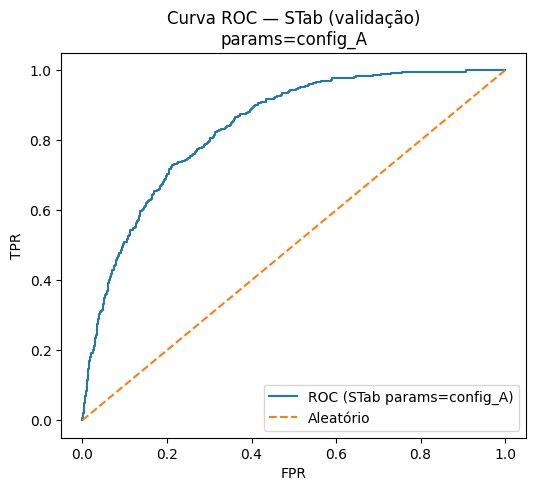

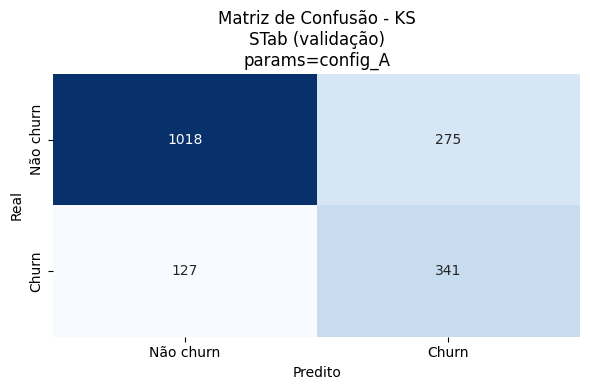

Device: cuda
Iniciando o treinamento do modelo STab...
Época 1/10000, Perda de Treino: 0.6500, Perda de Validação: 0.5770
Época 2/10000, Perda de Treino: 0.5431, Perda de Validação: 0.5611
Época 3/10000, Perda de Treino: 0.5175, Perda de Validação: 0.5400
Época 4/10000, Perda de Treino: 0.4951, Perda de Validação: 0.5086
Época 5/10000, Perda de Treino: 0.4649, Perda de Validação: 0.4740
Época 6/10000, Perda de Treino: 0.4471, Perda de Validação: 0.4597
Época 7/10000, Perda de Treino: 0.4415, Perda de Validação: 0.4543
Época 8/10000, Perda de Treino: 0.4401, Perda de Validação: 0.4519
Época 9/10000, Perda de Treino: 0.4370, Perda de Validação: 0.4494
Época 10/10000, Perda de Treino: 0.4296, Perda de Validação: 0.4445
Época 11/10000, Perda de Treino: 0.4321, Perda de Validação: 0.4428
Época 12/10000, Perda de Treino: 0.4221, Perda de Validação: 0.4428
Época 13/10000, Perda de Treino: 0.4225, Perda de Validação: 0.4406
Época 14/10000, Perda de Treino: 0.4237, Perda de Validação: 0.4372
Ép

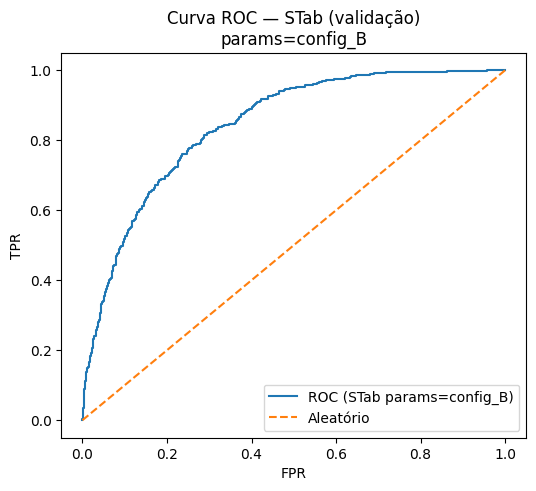

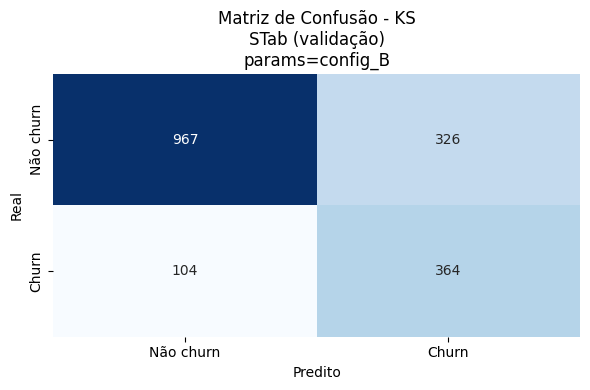

,model,loss_train,epochs_trained,AUC,KS,KS_threshold,Precision_0.5,Recall_0.5,F1_0.5,Precision_KS,Recall_KS,F1_KS,MSE_val,CrossEntropy_val
0,STab_config_A,0.380419,125,0.836670,0.515949,0.341681,0.639785,0.508547,0.566667,0.553571,0.728632,0.629151,0.139644,0.425793
1,STab_config_B,0.384243,91,0.842181,0.525651,0.300625,0.652406,0.521368,0.579572,0.527536,0.777778,0.628670,0.137684,0.420302


In [ ]:
# 7. Definição dos parâmetros do modelo STab e execução
stab_params_1 = {
    'model_name': 'config_A',
    'dim': 32,
    'depth': 3,
    'heads': 8,
    'lr': 0.0005,
    'patience': 30
}

stab_params_2 = {
    'model_name': 'config_B',
    'dim': 16,
    'depth': 2,
    'heads': 8,
    'lr': 0.001,
    'patience': 20
}

stab_results = []
stab_probs = {}

for p in [stab_params_1, stab_params_2]:
    row, m, probs = run_stab_and_log(p, X_train_np, y_train_np, X_val_np, y_val_np)
    stab_results.append(row)
    stab_probs[p['model_name']] = probs

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_val_np, probs)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC (STab params={p['model_name']})")
    plt.plot([0,1],[0,1],'--', label='Aleatório')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Curva ROC — STab (validação)\nparams={p["model_name"]}')
    plt.legend()
    plt.show()

    # Matriz de confusão - KS
    cm_stab = m['CM_KS']
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_stab, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Não churn','Churn'],
                yticklabels=['Não churn','Churn'])
    plt.title(f'Matriz de Confusão - KS\nSTab (validação)\nparams={p["model_name"]}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

df_results_stab = pd.DataFrame(stab_results)
display(df_results_stab)



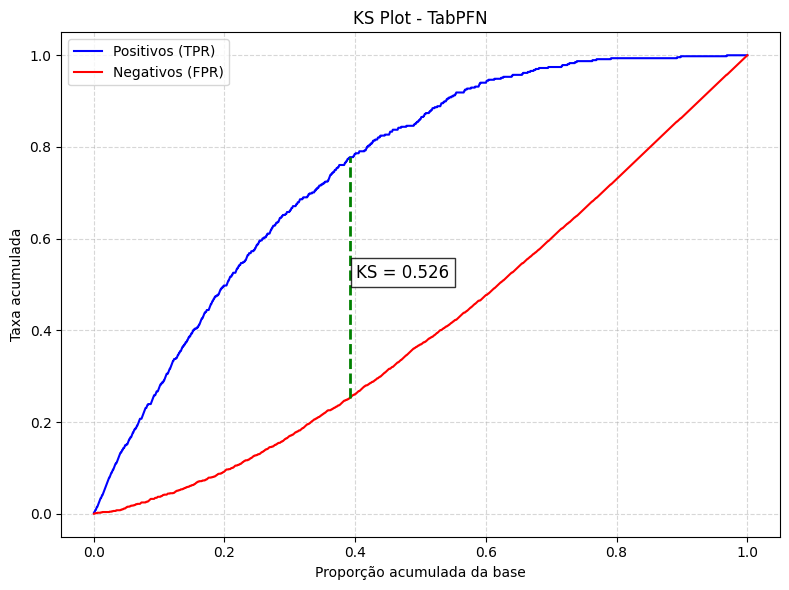

KS Statistic: 0.5257


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ks_plot(y_true, y_score, title="Gráfico KS"):
    # Garantir arrays numpy
    y_true = np.array(y_true)
    y_score = np.array(y_score)

    # Ordena por score decrescente
    order = np.argsort(-y_score)
    y_true_sorted = y_true[order]

    # Contagem total de positivos e negativos
    n_pos = np.sum(y_true_sorted == 1)
    n_neg = np.sum(y_true_sorted == 0)

    # Taxas acumuladas
    cum_pos_rate = np.cumsum(y_true_sorted == 1) / n_pos
    cum_neg_rate = np.cumsum(y_true_sorted == 0) / n_neg

    # KS statistic
    ks_values = np.abs(cum_pos_rate - cum_neg_rate)
    ks_stat = np.max(ks_values)
    ks_idx = np.argmax(ks_values)

    # Porcentagem no eixo X
    perc_amostras = np.arange(1, len(y_true_sorted)+1) / len(y_true_sorted)

    # Plot
    plt.figure(figsize=(8,6))
    plt.plot(perc_amostras, cum_pos_rate, label='Positivos (TPR)', color='blue')
    plt.plot(perc_amostras, cum_neg_rate, label='Negativos (FPR)', color='red')

    # Linha e anotação do KS
    plt.vlines(perc_amostras[ks_idx], cum_neg_rate[ks_idx], cum_pos_rate[ks_idx],
               color='green', linestyle='--', linewidth=2)
    plt.text(perc_amostras[ks_idx]+0.01,
             (cum_pos_rate[ks_idx]+cum_neg_rate[ks_idx])/2,
             f'KS = {ks_stat:.3f}', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.title(title)
    plt.xlabel('Proporção acumulada da base')
    plt.ylabel('Taxa acumulada')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return ks_stat

# Exemplo de uso:
ks_score = ks_plot(y_val_np, probs, title="KS Plot - TabPFN")
print(f"KS Statistic: {ks_score:.4f}")


In [ ]:
transformed_df = df.copy()

# 1. Variável binária: baixo tempo de contrato (<= 12 meses)
transformed_df['low_tenure'] = (transformed_df['tenure'] <= 12).astype(int)

# 2. Variável binária: contrato mensal
transformed_df['contract_monthly'] = (transformed_df['Contract'] == 'Month-to-month').astype(int)

# 3. Variável binária: alto custo mensal (>= 80)
transformed_df['high_monthly_charge'] = (transformed_df['MonthlyCharges'] >= 80).astype(int)

# 4. Variável binária: serviço de internet "Fiber optic"
transformed_df['internet_fiber'] = (transformed_df['InternetService'] == 'Fiber optic').astype(int)

# 5. Variável binária: ausência de OnlineSecurity ou TechSupport
transformed_df['no_security_or_support'] = ((transformed_df['OnlineSecurity'] == 'No') |
                                (transformed_df['TechSupport'] == 'No')).astype(int)

# 6. Variável binária: pagamento via Electronic check
transformed_df['pay_electronic_check'] = (transformed_df['PaymentMethod'] == 'Electronic check').astype(int)

# 7. Variável derivada: gasto médio por mês
transformed_df['avg_monthly_spend'] = transformed_df['TotalCharges'] / transformed_df['tenure'].replace(0, 1)

# 8. Interação: baixo tenure + contrato mensal
transformed_df['short_monthly_contract'] = ((transformed_df['low_tenure'] == 1) &
                                 (transformed_df['contract_monthly'] == 1)).astype(int)

# 9. Interação: alto custo mensal + Fiber optic
transformed_df['fiber_high_cost'] = ((transformed_df['internet_fiber'] == 1) &
                         (transformed_df['high_monthly_charge'] == 1)).astype(int)

# 10. Número total de serviços ativos (entre os serviços listados)
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
transformed_df['num_services'] = transformed_df[service_cols].apply(lambda row: sum(val == 'Yes' for val in row), axis=1)

# 11. Variável binária: baixo engajamento (<= 2 serviços)
transformed_df['low_engagement'] = (transformed_df['num_services'] <= 2).astype(int)

# 12. Score agregado de risco
transformed_df['risk_score'] = (
    transformed_df['low_tenure'] +
    transformed_df['high_monthly_charge'] +
    transformed_df['internet_fiber'] +
    transformed_df['pay_electronic_check'] +
    transformed_df['contract_monthly']
)

# 13. Categoria de risco baseada no score
transformed_df['risk_category'] = pd.cut(transformed_df['risk_score'], bins=[-1, 1, 3, 5],
                              labels=['Low', 'Medium', 'High'])


transformed_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,internet_fiber,no_security_or_support,pay_electronic_check,avg_monthly_spend,short_monthly_contract,fiber_high_cost,num_services,low_engagement,risk_score,risk_category
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,1,1,29.850000,1,0,1,1,3,Medium
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,1,0,55.573529,0,0,2,1,0,Low
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0,1,0,54.075000,1,0,2,1,2,Medium
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,0,0,0,40.905556,0,0,3,0,0,Low
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,1,1,1,75.825000,1,0,0,1,4,High


In [ ]:
# Exemplo de concatenação com outros resultados
df_compare = pd.concat([df_results_stab], ignore_index=True)
df_compare.sort_values(by='KS', ascending=False, inplace=True)
display(df_compare)

,model,loss_train,epochs_trained,AUC,KS,KS_threshold,Precision_0.5,Recall_0.5,F1_0.5,Precision_KS,Recall_KS,F1_KS,MSE_val,CrossEntropy_val
1,STab_config_B,0.384243,91,0.842181,0.525651,0.300625,0.652406,0.521368,0.579572,0.527536,0.777778,0.628670,0.137684,0.420302
0,STab_config_A,0.380419,125,0.836670,0.515949,0.341681,0.639785,0.508547,0.566667,0.553571,0.728632,0.629151,0.139644,0.425793


In [ ]:
stab_params_1 = {
    'model_name': 'config_A',
    'dim': 32,            # dimensão maior para captar mais complexidade
    'depth': 3,           # profundidade intermediária
    'heads': 8,           # multi-head attention maior
    'lr': 0.0005,         # lr menor para treino mais estável
    'patience': 30,       # paciência maior para evitar early stop prematuro
    'batch_size': 256,
    'weight_decay': 1e-4,
    'epochs': 10000
}

stab_params_2 = {
    'model_name': 'config_B',
    'dim': 16,            # dimensão menor para treino mais rápido
    'depth': 2,           # menos camadas
    'heads': 8,
    'lr': 0.001,          # lr maior para convergência mais rápida
    'patience': 20,
    'batch_size': 256,
    'weight_decay': 1e-4,
    'epochs': 10000
}

stab_params_3 = {
    'model_name': 'config_C',
    'dim': 64,            # dimensão maior para tentar captar mais padrões
    'depth': 4,           # mais camadas para profundidade maior
    'heads': 4,           # menos cabeças, mais foco por cabeça
    'lr': 0.0003,         # lr ainda menor para maior estabilidade
    'patience': 40,       # mais paciência para permitir mais epochs
    'batch_size': 128,    # batch menor para melhor generalização
    'weight_decay': 5e-5,
    'epochs': 10000
}

stab_params_4 = {
    'model_name': 'config_D',
    'dim': 16,
    'depth': 5,           # profundidade maior, mas dimensão menor
    'heads': 2,           # menos cabeças para simplificar
    'lr': 0.0007,
    'patience': 25,
    'batch_size': 512,    # batch maior para acelerar treino
    'weight_decay': 1e-3,
    'epochs': 10000
}

stab_params_5 = {
    'model_name': 'config_E',
    'dim': 32,
    'depth': 3,
    'heads': 6,
    'lr': 0.0001,         # lr bem baixo para treino mais cuidadoso
    'patience': 50,       # paciência alta para evitar corte prematuro
    'batch_size': 256,
    'weight_decay': 1e-4,
    'epochs': 15000
}


In [ ]:
X, y = get_X_y(transformed_df)

X_train, X_temp, y_train, y_temp = get_train_val_test(transformed_df, X, y)
X_val, X_test, y_val, y_test = get_val_test(transformed_df, X_temp, y_temp)

Device: cuda
Iniciando o treinamento do modelo STab...
Época 1/10000, Perda de Treino: 0.5370, Perda de Validação: 0.5386
Época 2/10000, Perda de Treino: 0.4960, Perda de Validação: 0.4938
Época 3/10000, Perda de Treino: 0.4629, Perda de Validação: 0.4675
Época 4/10000, Perda de Treino: 0.4464, Perda de Validação: 0.4626
Época 5/10000, Perda de Treino: 0.4441, Perda de Validação: 0.4681
Época 6/10000, Perda de Treino: 0.4460, Perda de Validação: 0.4619
Época 7/10000, Perda de Treino: 0.4331, Perda de Validação: 0.4592
Época 8/10000, Perda de Treino: 0.4332, Perda de Validação: 0.4544
Época 9/10000, Perda de Treino: 0.4271, Perda de Validação: 0.4506
Época 10/10000, Perda de Treino: 0.4279, Perda de Validação: 0.4499
Época 11/10000, Perda de Treino: 0.4262, Perda de Validação: 0.4450
Época 12/10000, Perda de Treino: 0.4255, Perda de Validação: 0.4470
Época 13/10000, Perda de Treino: 0.4159, Perda de Validação: 0.4457
Época 14/10000, Perda de Treino: 0.4192, Perda de Validação: 0.4490
Ép

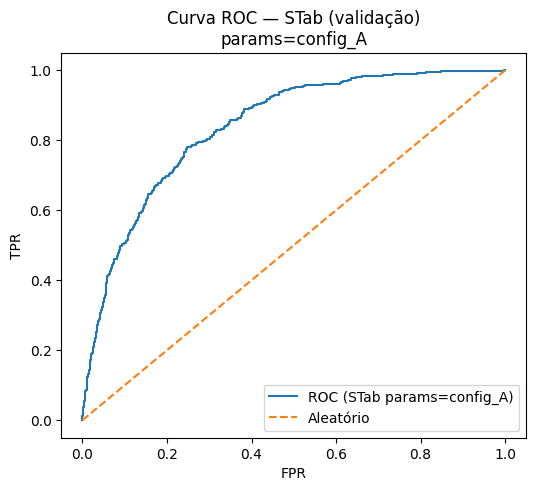

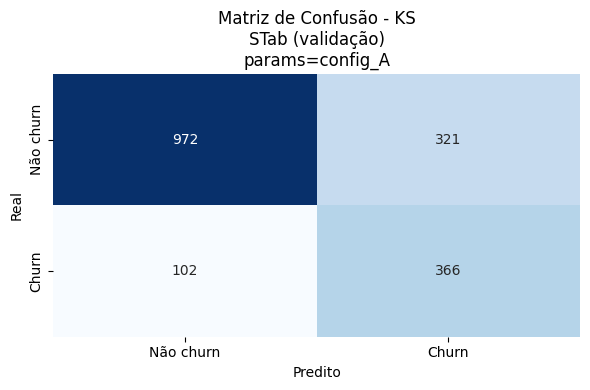

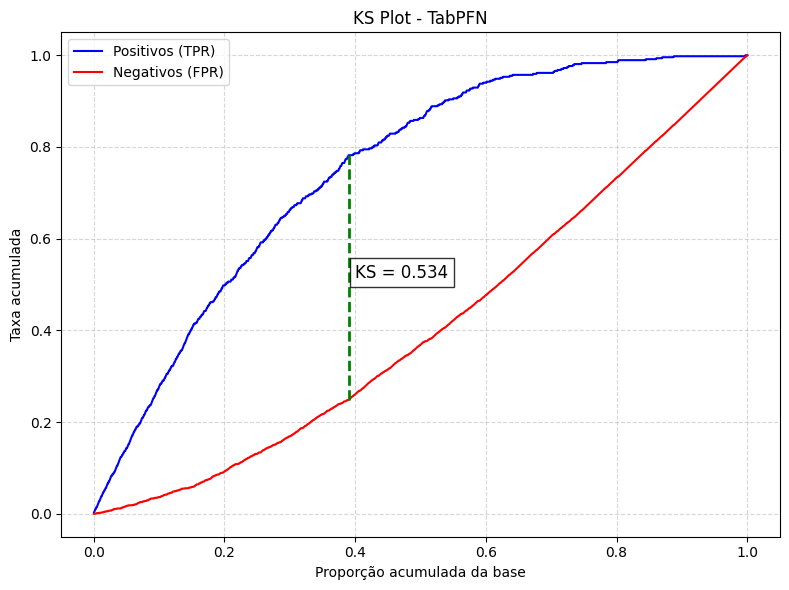

KS Statistic: 0.5338
Device: cuda
Iniciando o treinamento do modelo STab...
Época 1/10000, Perda de Treino: 0.5577, Perda de Validação: 0.5555
Época 2/10000, Perda de Treino: 0.5167, Perda de Validação: 0.5252
Época 3/10000, Perda de Treino: 0.4790, Perda de Validação: 0.4805
Época 4/10000, Perda de Treino: 0.4525, Perda de Validação: 0.4644
Época 5/10000, Perda de Treino: 0.4520, Perda de Validação: 0.4625
Época 6/10000, Perda de Treino: 0.4383, Perda de Validação: 0.4572
Época 7/10000, Perda de Treino: 0.4401, Perda de Validação: 0.4531
Época 8/10000, Perda de Treino: 0.4272, Perda de Validação: 0.4486
Época 9/10000, Perda de Treino: 0.4241, Perda de Validação: 0.4444
Época 10/10000, Perda de Treino: 0.4283, Perda de Validação: 0.4478
Época 11/10000, Perda de Treino: 0.4200, Perda de Validação: 0.4447
Época 12/10000, Perda de Treino: 0.4207, Perda de Validação: 0.4427
Época 13/10000, Perda de Treino: 0.4180, Perda de Validação: 0.4401
Época 14/10000, Perda de Treino: 0.4157, Perda de

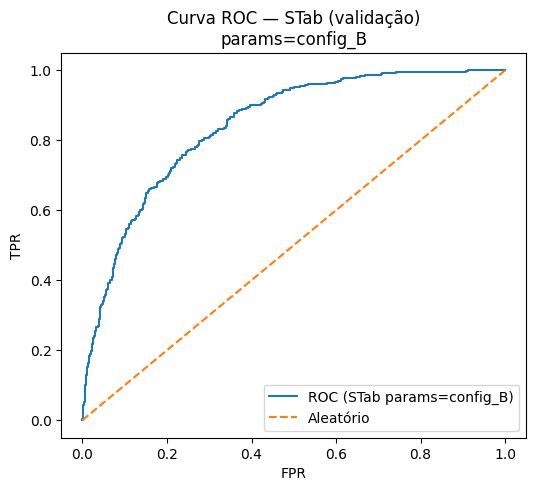

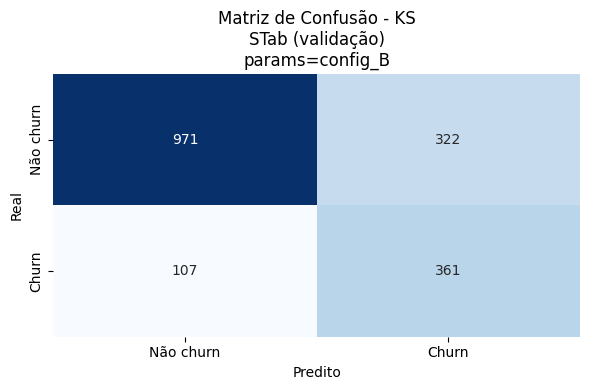

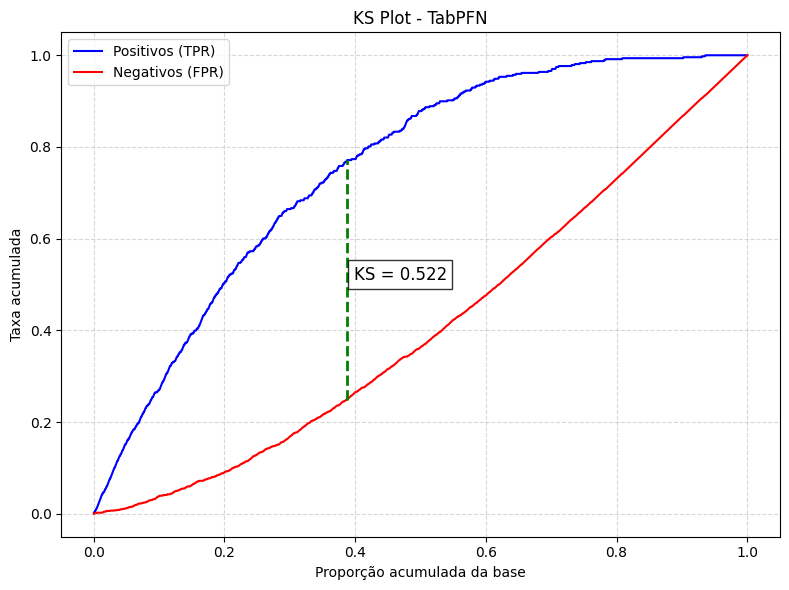

KS Statistic: 0.5223
Device: cuda
Iniciando o treinamento do modelo STab...
Época 1/10000, Perda de Treino: 0.5364, Perda de Validação: 0.5184
Época 2/10000, Perda de Treino: 0.4632, Perda de Validação: 0.4606
Época 3/10000, Perda de Treino: 0.4319, Perda de Validação: 0.4478
Época 4/10000, Perda de Treino: 0.4291, Perda de Validação: 0.4540
Época 5/10000, Perda de Treino: 0.4259, Perda de Validação: 0.4383
Época 6/10000, Perda de Treino: 0.4147, Perda de Validação: 0.4353
Época 7/10000, Perda de Treino: 0.4103, Perda de Validação: 0.4390
Época 8/10000, Perda de Treino: 0.4044, Perda de Validação: 0.4311
Época 9/10000, Perda de Treino: 0.4097, Perda de Validação: 0.4291
Época 10/10000, Perda de Treino: 0.4028, Perda de Validação: 0.4286
Época 11/10000, Perda de Treino: 0.4106, Perda de Validação: 0.4303
Época 12/10000, Perda de Treino: 0.4066, Perda de Validação: 0.4289
Época 13/10000, Perda de Treino: 0.4111, Perda de Validação: 0.4263
Época 14/10000, Perda de Treino: 0.4008, Perda de

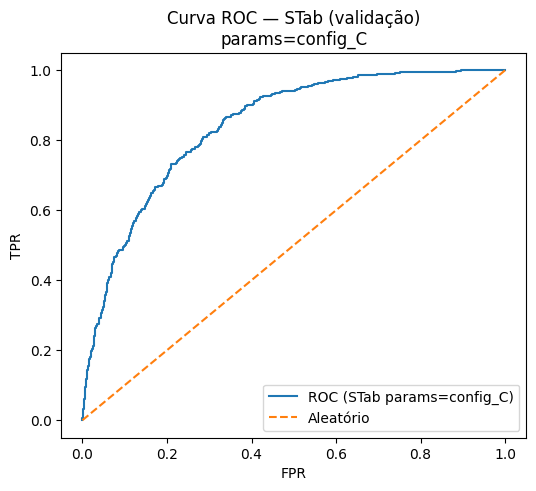

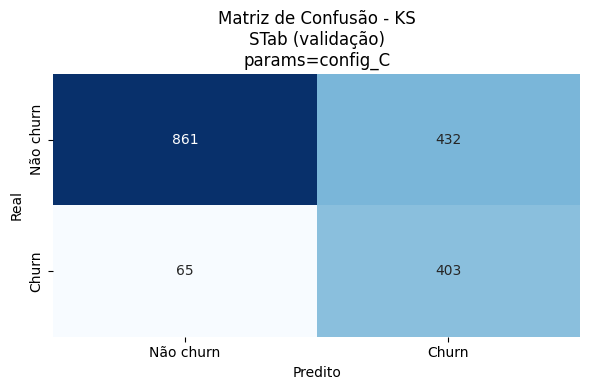

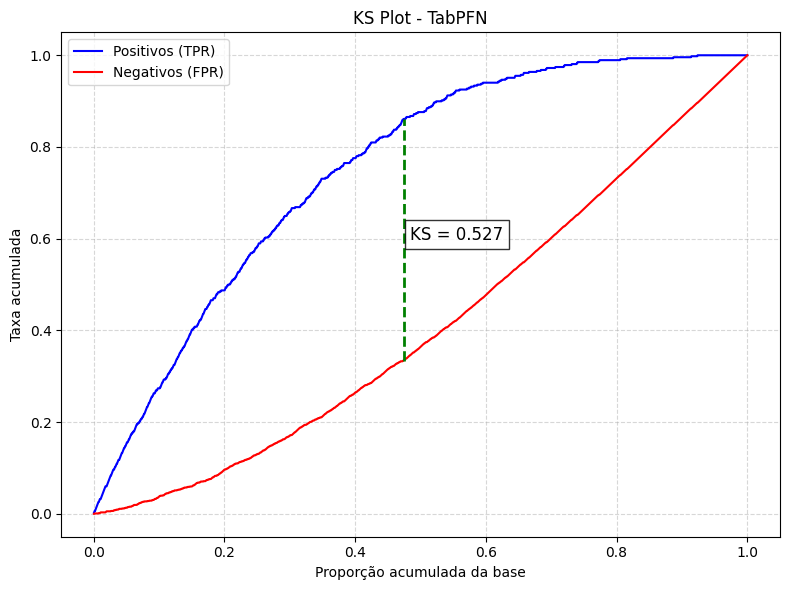

KS Statistic: 0.5270
Device: cuda
Iniciando o treinamento do modelo STab...
Época 1/10000, Perda de Treino: 0.5389, Perda de Validação: 0.5368
Época 2/10000, Perda de Treino: 0.5008, Perda de Validação: 0.5097
Época 3/10000, Perda de Treino: 0.4818, Perda de Validação: 0.4890
Época 4/10000, Perda de Treino: 0.4654, Perda de Validação: 0.4832
Época 5/10000, Perda de Treino: 0.4582, Perda de Validação: 0.4703
Época 6/10000, Perda de Treino: 0.4542, Perda de Validação: 0.4663
Época 7/10000, Perda de Treino: 0.4452, Perda de Validação: 0.4585
Época 8/10000, Perda de Treino: 0.4521, Perda de Validação: 0.4591
Época 9/10000, Perda de Treino: 0.4384, Perda de Validação: 0.4542
Época 10/10000, Perda de Treino: 0.4427, Perda de Validação: 0.4598
Época 11/10000, Perda de Treino: 0.4439, Perda de Validação: 0.4529
Época 12/10000, Perda de Treino: 0.4293, Perda de Validação: 0.4493
Época 13/10000, Perda de Treino: 0.4275, Perda de Validação: 0.4522
Época 14/10000, Perda de Treino: 0.4286, Perda de

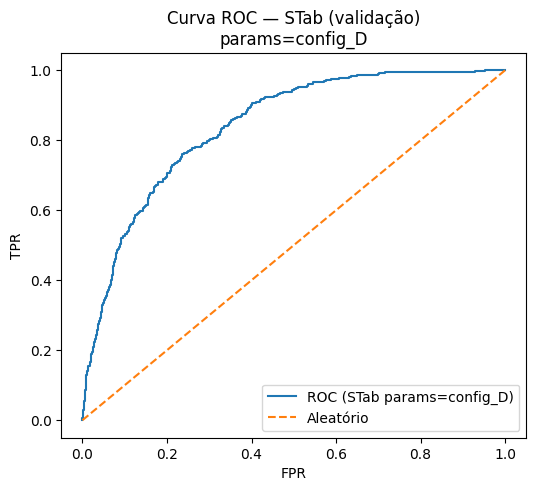

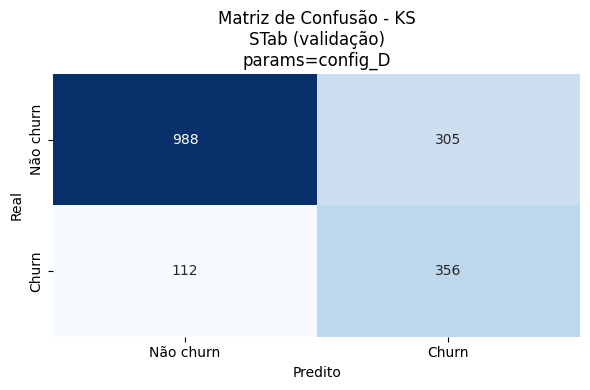

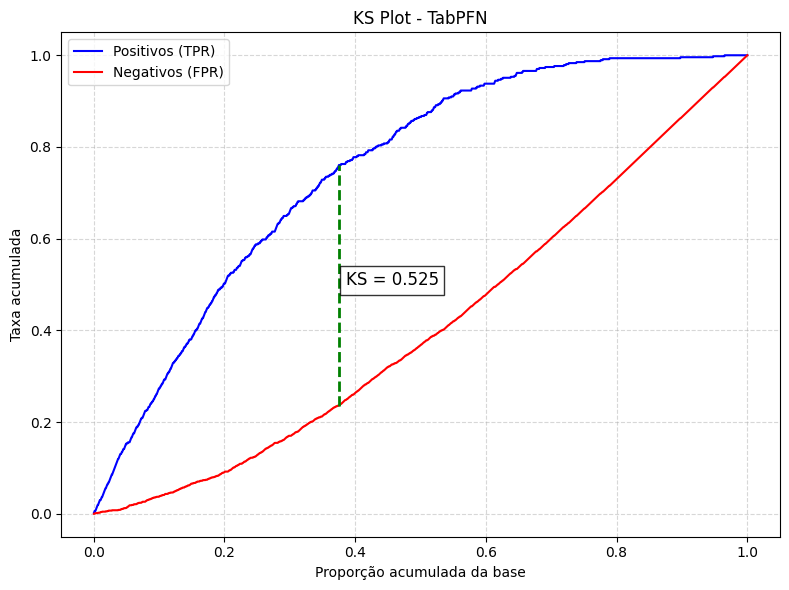

KS Statistic: 0.5248
Device: cuda
Iniciando o treinamento do modelo STab...
Época 1/15000, Perda de Treino: 0.6086, Perda de Validação: 0.5816
Época 2/15000, Perda de Treino: 0.5551, Perda de Validação: 0.5740
Época 3/15000, Perda de Treino: 0.5415, Perda de Validação: 0.5616
Época 4/15000, Perda de Treino: 0.5299, Perda de Validação: 0.5537
Época 5/15000, Perda de Treino: 0.5193, Perda de Validação: 0.5415
Época 6/15000, Perda de Treino: 0.5077, Perda de Validação: 0.5340
Época 7/15000, Perda de Treino: 0.4962, Perda de Validação: 0.5222
Época 8/15000, Perda de Treino: 0.4886, Perda de Validação: 0.5123
Época 9/15000, Perda de Treino: 0.4771, Perda de Validação: 0.5018
Época 10/15000, Perda de Treino: 0.4743, Perda de Validação: 0.4901
Época 11/15000, Perda de Treino: 0.4620, Perda de Validação: 0.4846
Época 12/15000, Perda de Treino: 0.4569, Perda de Validação: 0.4769
Época 13/15000, Perda de Treino: 0.4485, Perda de Validação: 0.4701
Época 14/15000, Perda de Treino: 0.4469, Perda de

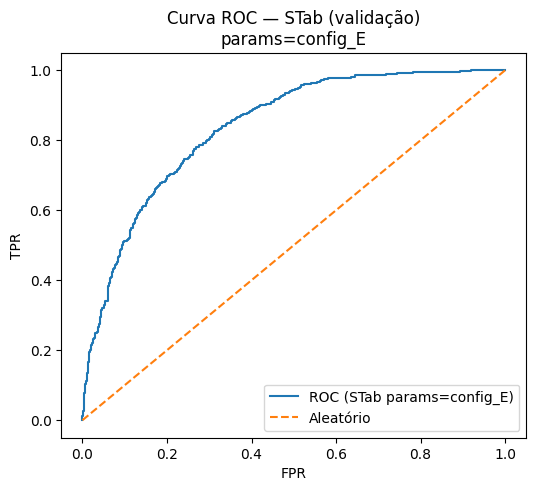

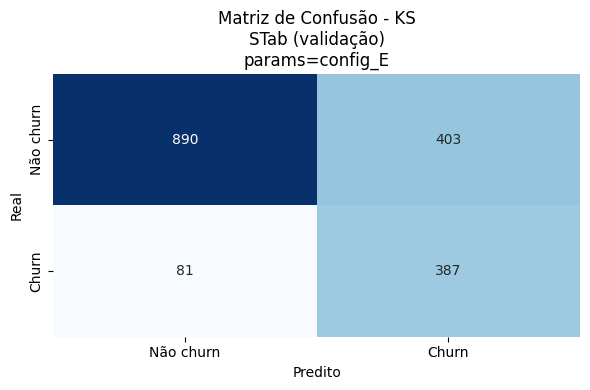

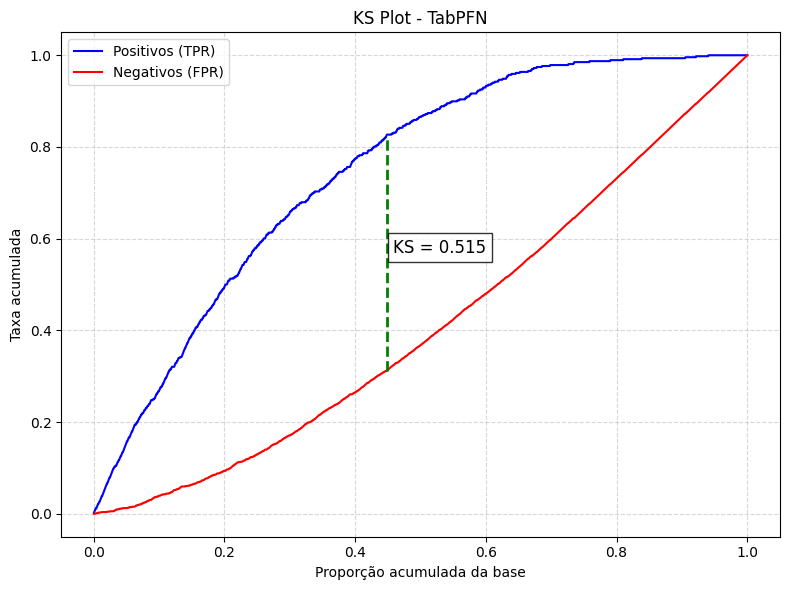

KS Statistic: 0.5152


,model,loss_train,epochs_trained,AUC,KS,KS_threshold,Precision_0.5,Recall_0.5,F1_0.5,Precision_KS,Recall_KS,F1_KS,MSE_val,CrossEntropy_val
0,STab_config_A,0.380419,125,0.836670,0.515949,0.341681,0.639785,0.508547,0.566667,0.553571,0.728632,0.629151,0.139644,0.425793
1,STab_config_B,0.384243,91,0.842181,0.525651,0.300625,0.652406,0.521368,0.579572,0.527536,0.777778,0.628670,0.137684,0.420302
2,STab_config_A,0.370096,158,0.838739,0.533791,0.285399,0.665714,0.497863,0.569682,0.532751,0.782051,0.633766,0.138437,0.423733
3,STab_config_B,0.385093,81,0.842062,0.522334,0.279699,0.678571,0.446581,0.538660,0.528551,0.771368,0.627281,0.137691,0.421181
4,STab_config_C,0.384595,94,0.841401,0.527004,0.213112,0.687898,0.461538,0.552430,0.482635,0.861111,0.618573,0.138075,0.421399
5,STab_config_D,0.384065,147,0.840061,0.524798,0.305353,0.666667,0.521368,0.585132,0.538578,0.760684,0.630647,0.138528,0.422804
6,STab_config_E,0.392418,249,0.837174,0.515245,0.230820,0.651811,0.500000,0.565901,0.489873,0.826923,0.615262,0.139551,0.426455


In [ ]:
for p in [stab_params_1, stab_params_2, stab_params_3, stab_params_4, stab_params_5]:
    row, m, probs = run_stab_and_log(p, X_train_np, y_train_np, X_val_np, y_val_np)
    stab_results.append(row)
    stab_probs[p['model_name']] = probs

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_val_np, probs)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC (STab params={p['model_name']})")
    plt.plot([0,1],[0,1],'--', label='Aleatório')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Curva ROC — STab (validação)\nparams={p["model_name"]}')
    plt.legend()
    plt.show()

    # Matriz de confusão - KS
    cm_stab = m['CM_KS']
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_stab, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Não churn','Churn'],
                yticklabels=['Não churn','Churn'])
    plt.title(f'Matriz de Confusão - KS\nSTab (validação)\nparams={p["model_name"]}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

    ks_score = ks_plot(y_val_np, probs, title="KS Plot - TabPFN")
    print(f"KS Statistic: {ks_score:.4f}")

df_results_stab = pd.DataFrame(stab_results)
display(df_results_stab)

In [ ]:
df_compare = pd.concat([df_results_stab], ignore_index=True)
df_compare.sort_values(by='KS', ascending=False, inplace=True)
display(df_compare)

,model,loss_train,epochs_trained,AUC,KS,KS_threshold,Precision_0.5,Recall_0.5,F1_0.5,Precision_KS,Recall_KS,F1_KS,MSE_val,CrossEntropy_val
2,STab_config_A,0.370096,158,0.838739,0.533791,0.285399,0.665714,0.497863,0.569682,0.532751,0.782051,0.633766,0.138437,0.423733
4,STab_config_C,0.384595,94,0.841401,0.527004,0.213112,0.687898,0.461538,0.552430,0.482635,0.861111,0.618573,0.138075,0.421399
1,STab_config_B,0.384243,91,0.842181,0.525651,0.300625,0.652406,0.521368,0.579572,0.527536,0.777778,0.628670,0.137684,0.420302
5,STab_config_D,0.384065,147,0.840061,0.524798,0.305353,0.666667,0.521368,0.585132,0.538578,0.760684,0.630647,0.138528,0.422804
3,STab_config_B,0.385093,81,0.842062,0.522334,0.279699,0.678571,0.446581,0.538660,0.528551,0.771368,0.627281,0.137691,0.421181
0,STab_config_A,0.380419,125,0.836670,0.515949,0.341681,0.639785,0.508547,0.566667,0.553571,0.728632,0.629151,0.139644,0.425793
6,STab_config_E,0.392418,249,0.837174,0.515245,0.230820,0.651811,0.500000,0.565901,0.489873,0.826923,0.615262,0.139551,0.426455
